# EDA (Exploratory Data Analysis)

#### Importing Pandas

In [1]:
import pandas as pd


#### Reading in the available data and printing it out

In [9]:
ava = pd.read_pickle('../../data/ava_st1_ns4_56.pkl') 
comp = pd.read_pickle('../../data/comp_st1_ns4_56.pkl')


#### Check for Missing Values

In [5]:
missing_values_count = max(ava.isnull().sum())
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


#### Identify and Drop Constant Columns

In [11]:
# Shows all columns with only 1 unique value
constant_columns = [col for col in ava.columns if ava[col].nunique() < 2]
print(f"The Constant Columns Are: {constant_columns}")
print(f"Number of constant columns: {len(constant_columns)}")

# Drop the constant columns
print(f"Number of columns before dropping constant columns: {len(ava.columns)}")
ava.drop(labels=constant_columns, axis=1, inplace=True)
comp.drop(labels=constant_columns, axis=1, inplace=True)
print(f"Number of columns after dropping constant columns: {len(ava.columns)}")



The Constant Columns Are: ['apcp_sf3_1', 'apcp_sf1_2', 'apcp_sf2_2', 'uswrf_s1_2']
Number of constant columns: 4
Number of columns before dropping constant columns: 301
Number of columns after dropping constant columns: 297


#### Detect Categorical Columns

In [15]:
#Check for categorical columns
categorical_columns = ava.select_dtypes(include=['category']).columns
print(f"The Categorical Columns Are: {categorical_columns}")
print(f"Number of categorical columns: {len(categorical_columns)}")


The Categorical Columns Are: Index(['dswrf_s4_1', 'tmax_2m5_1', 'ulwrf_t4_1', 'uswrf_s3_1', 'uswrf_s4_1',
       'pwat_ea4_2', 'tmp_sfc5_2', 'ulwrf_s5_2', 'pres_ms2_3', 'pwat_ea4_3',
       'tcdc_ea2_3', 'tcolc_e1_3', 'tcolc_e5_3', 'tmp_sfc3_3', 'dswrf_s5_4',
       'tmin_2m4_4', 'tmp_2m_4_4'],
      dtype='object')
Number of categorical columns: 17


#### Visualization of Data

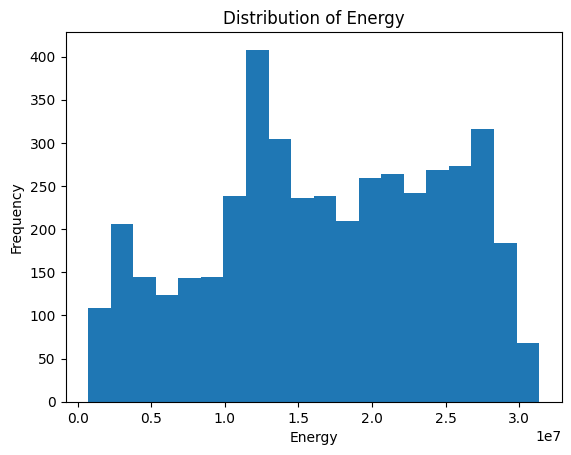

In [16]:
import matplotlib.pyplot as plt

plt.hist(ava['energy'], bins=20) 
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.show()


## EDA Summary

Constant Columns: There are four constant column ['apcp_sf3_1', 'apcp_sf1_2', 'apcp_sf2_2', 'uswrf_s1_2']. These columns will be dropped from the dataset as they are redundant and would not contribute to the model accuracy. 

Missing Values: There are no missing values.

Categorical Variables: There are 17 categorical columns detected. This will be an issue for models like KNN and SVM because these algorithms are typically designed to work with numerical data. KNN relies on a distance metric to find the "nearest neighbors" in the feature space. Common distance metrics include Euclidean distance. For numerical features, distance calculations are straightforward. However, when dealing with categorical features, defining meaningful distances becomes more complex. SVMs often use the "kernel trick" to implicitly map data into a higher-dimensional space. This is more straightforward with numerical features. We will implement one-hot encoding to convert categorical features into numerical features.